In [1]:
%matplotlib inline

There are 7 main steps to simulate an X-ray image from a JSON file:
1. Describe the simulation environment in a JSON file, e.g. configuration-03.json here:

```json
{
    "WindowSize": [512, 512],

    "Detector": {
        "Position": [10.0, 0.0, 0.0, "cm"],        
        "UpVector": [0, 0, -1],
        "NumberOfPixels": [640, 320],
        "Size": [500, 500, "mm"],
        "Spacing": [0.5, 0.5, "mm"]
    },

    
    "Source": {
        "Position": [-40.0,  0.0, 0.0, "cm"],
        "Shape": "PointSource",
        "Beam": [
            {
                "Energy": 0.08,
                "Unit": "MeV",
                "PhotonCount": 1000
            }
        ]
    },

    "Samples": [
        {
            "Label": "Dragon",
            "Path": "input_data/welsh-dragon-small.stl",
            "Unit": "mm",
            "Material": ["Mixture", "Ti90Al6V4"],
            "Density": 4.43,
            "Type" : "inner"
        }
    ]
}
```
2. OpenGL context:
    - `json2gvxr.initGVXR("configuration-03.json", renderer="OPENGL")` for an interactive visualisation window
    - `json2gvxr.initGVXR("configuration-03.json", renderer="EGL")` for offline rendering. It is suitable for a GNU/Linux supercomputer.
3. Source: `json2gvxr.initSourceGeometry()`
4. Spectrum: `spectrum, unit, k, f = json2gvxr.initSpectrum()`
5. Detector: `json2gvxr.initDetector()`
6. Sample: `json2gvxr.initSamples()`
7. Compute the corresponding X-ray image: `gvxr.computeXRayImage()`

In [12]:
import numpy as np # Who does not use Numpy?
import matplotlib # To plot images
import matplotlib.pyplot as plt # Plotting
from matplotlib.colors import LogNorm # Look up table

font = {'family' : 'serif',
         'size'   : 22
       }
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

from tifffile import imwrite # Write TIFF files

from gvxrPython3 import gvxr # Simulate X-ray images
import json2gvxr # Set the X-ray simulation environment

We added `import json2gvxr` to the list of modules.

# Create an OpenGL context

To create an OpenGL context, the renderer is either "OPENGL" or "EGL". 
OPENGL is used to create an interactive visualisation window; EGL is used for offline rendering only, e.g. on a supercomputer.

In [4]:
json2gvxr.initGVXR("configuration-03.json", renderer="OPENGL")

Create an OpenGL context: 512x512


Tue Apr 23 14:26:22 2024 ---- Create window (ID: -1)
Tue Apr 23 14:26:22 2024 ---- Initialise GLFW
Tue Apr 23 14:26:22 2024 ---- Create an OpenGL window with a 3.2 context.
Tue Apr 23 14:26:22 2024 ---- Make the window's context current
Tue Apr 23 14:26:22 2024 ---- Initialise GLEW
Tue Apr 23 14:26:22 2024 ---- OpenGL vendor: Intel
Tue Apr 23 14:26:22 2024 ---- OpenGL renderer: Mesa Intel(R) Graphics (RPL-P)
Tue Apr 23 14:26:22 2024 ---- OpenGL version: 4.6 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Tue Apr 23 14:26:22 2024 ---- Use OpenGL 4.5.
Tue Apr 23 14:26:22 2024 ---- Initialise the X-ray renderer if needed and if possible


# Set up a monochromatic source

In [5]:
json2gvxr.initSourceGeometry()
spectrum, unit, k, f = json2gvxr.initSpectrum()

Set up the beam
	Source position: [-40.0, 0.0, 0.0, 'cm']
	Source shape: PointSource


# Set up an ideal detector

In [6]:
print("Set up the detector");
json2gvxr.initDetector()

Set up the detector
Set up the detector
	Detector position: [10.0, 0.0, 0.0, 'cm']
	Detector up vector: [0, 0, -1]
	Detector number of pixels: [640, 320]
	Pixel spacing: [0.5, 0.5, 'mm']


Tue Apr 23 14:26:42 2024 ---- Initialise the renderer


# Load the sample data

In [7]:
json2gvxr.initSamples()

Tue Apr 23 14:26:45 2024 ---- file_name:	input_data/welsh-dragon-small.stl	nb_faces:	457345	nb_vertices:	1372035	bounding_box (in cm):	(-4.47065, -74.9368, 23.5909)	(2.37482, -59.4256, 36.0343)


In [10]:
print("Move the Dragon to the centre")
gvxr.moveToCentre("Dragon")

Move the Dragon to the centre


# Compute an X-ray image

We convert the array in a Numpy structure and store the data using single-precision floating-point numbers.

In [11]:
print("Compute an X-ray image");
x_ray_image = np.array(gvxr.computeXRayImage()).astype(np.single)

Compute an X-ray image


# Save the X-ray image in a TIFF file

In [13]:
imwrite('output_data/raw_x-ray_image-03.tif', x_ray_image)

# Display the X-ray image

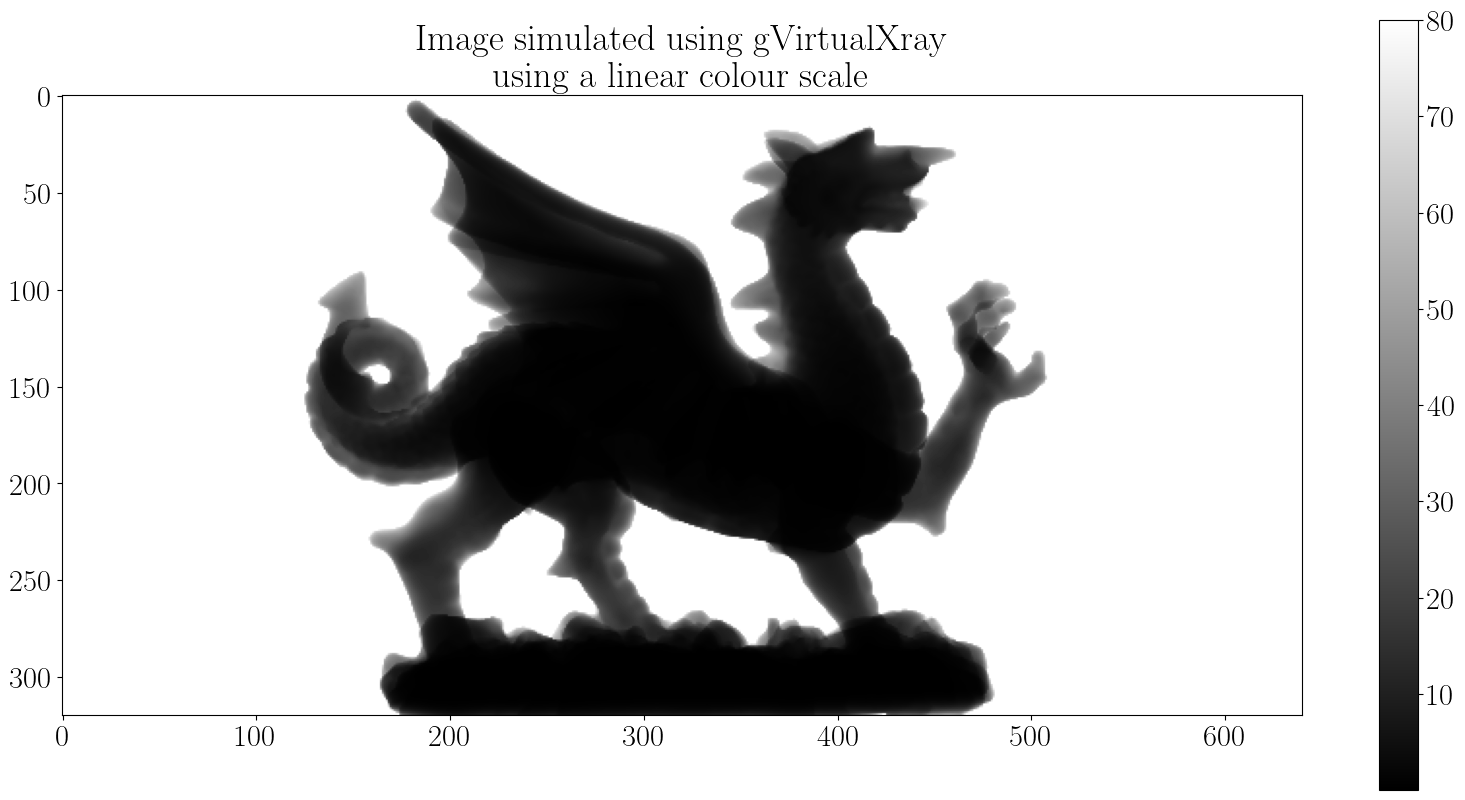

In [14]:
plt.figure(figsize=(20, 10))
plt.title("Image simulated using gVirtualXray\nusing a linear colour scale")
plt.imshow(x_ray_image, cmap="gray")
plt.colorbar(orientation='vertical');
plt.show()

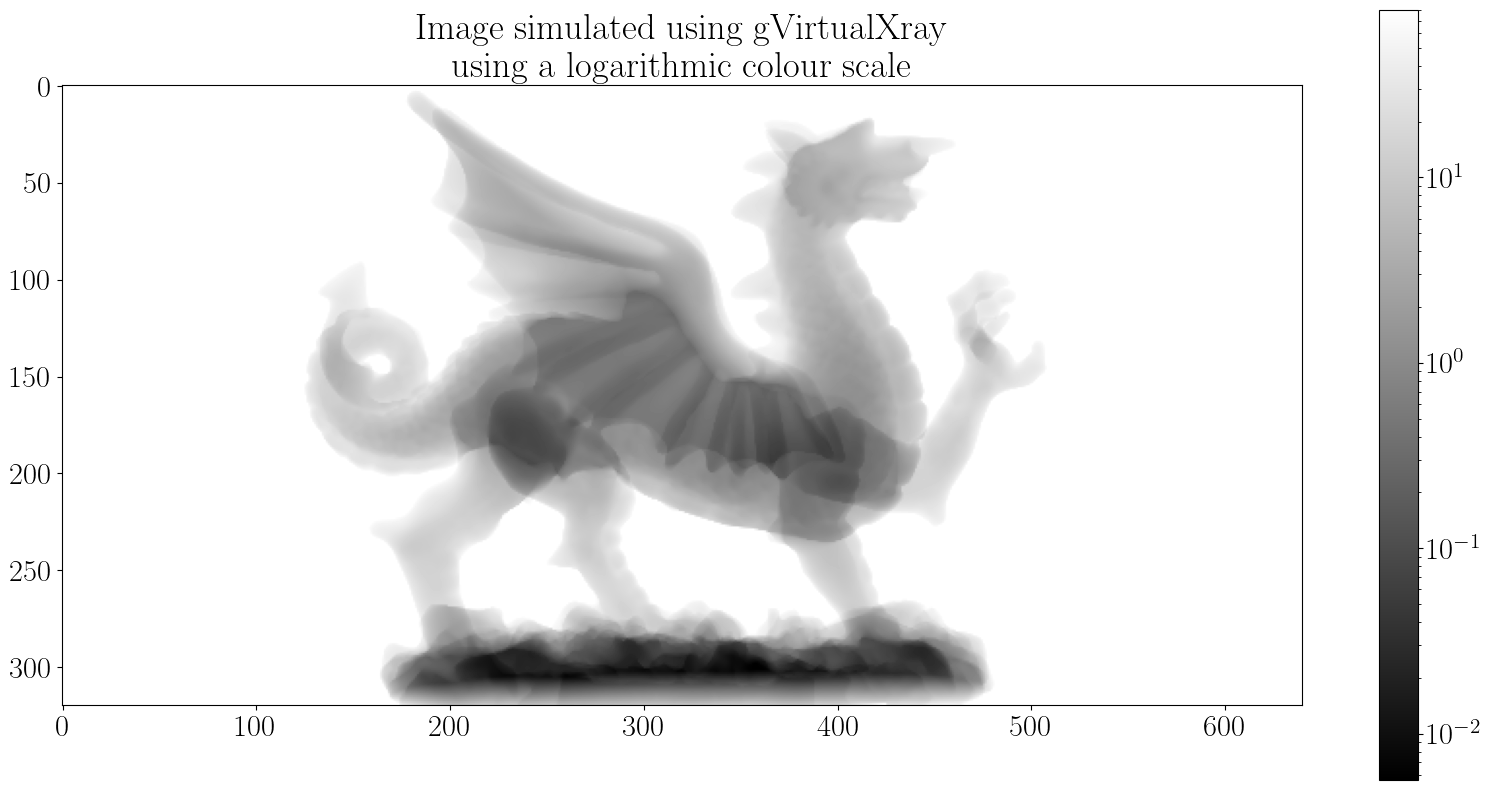

In [15]:
plt.figure(figsize=(20, 10))
plt.title("Image simulated using gVirtualXray\nusing a logarithmic colour scale")
plt.imshow(x_ray_image, cmap="gray", norm=LogNorm(vmin=x_ray_image.min(), vmax=x_ray_image.max()))
plt.colorbar(orientation='vertical');
plt.show()

# Update the visualisation window

In [16]:
gvxr.displayScene()

# Interactive visualisation

The user can rotate the 3D scene and zoom-in and -out in the visualisation window.

- Keys are:
    - Q/Escape: to quit the event loop (does not close the window)
    - B: display/hide the X-ray beam
    - W: display the polygon meshes in solid or wireframe
    - N: display the X-ray image in negative or positive
    - H: display/hide the X-ray detector
- Mouse interactions:
    - Zoom in/out: mouse wheel
    - Rotation: Right mouse button down + move cursor

In [17]:
gvxr.renderLoop()

# Take a screenshot

This image can be used in a research paper to illustrate the simulation environment, in which case you may want to change the background colour to white with:

In [18]:
gvxr.setWindowBackGroundColour(1.0, 1.0, 1.0)

or dark-grey

In [19]:
gvxr.setWindowBackGroundColour(0.25, 0.25, 0.25)

and update the visualisation window

In [20]:
gvxr.displayScene()

take the screenshot and save it in a file

In [17]:
screenshot = gvxr.takeScreenshot()

In [18]:
plt.imsave("output_data/screenshot-03.png", np.array(screenshot))

display it using Matplotlib

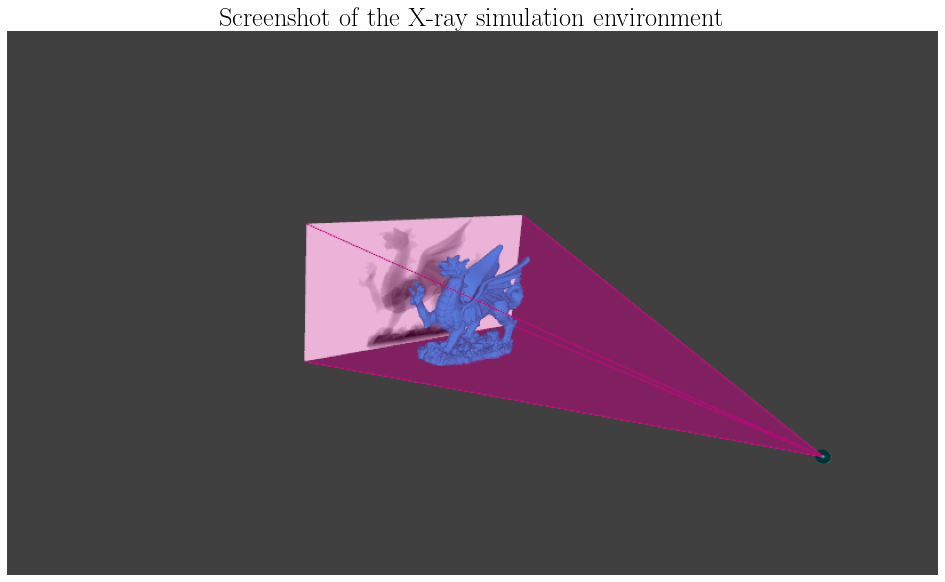

In [19]:
plt.figure(figsize=(20, 10))
plt.imshow(screenshot)
plt.title("Screenshot of the X-ray simulation environment")
plt.axis('off');
plt.show()

## All done

Destroy the window

In [21]:
gvxr.destroyAllWindows()

Tue Apr 23 14:28:35 2024 ---- Destroy all the windows
Tue Apr 23 14:28:35 2024 ---- Destroy window 0(0x5acd7e64e3f0)
